# RNN Stock analysis

In [110]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Read the Dataset

read each day as observation 

In [111]:
import pandas as pd

well = pd.read_csv("./WFC.csv")

well.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-22,50.630001,51.110001,49.730000,50.340000,48.873283,28549400
1,2021-11-23,50.709999,51.740002,50.700001,51.400002,49.902393,28024400
2,2021-11-24,51.509998,51.740002,51.180000,51.310001,49.815018,18901900
3,2021-11-26,49.099998,49.099998,47.689999,48.430000,47.018929,29919300
4,2021-11-29,49.669998,49.770000,48.310001,49.160000,47.727661,27677000


In [112]:
well

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-22,50.630001,51.110001,49.730000,50.340000,48.873283,28549400
1,2021-11-23,50.709999,51.740002,50.700001,51.400002,49.902393,28024400
2,2021-11-24,51.509998,51.740002,51.180000,51.310001,49.815018,18901900
3,2021-11-26,49.099998,49.099998,47.689999,48.430000,47.018929,29919300
4,2021-11-29,49.669998,49.770000,48.310001,49.160000,47.727661,27677000
...,...,...,...,...,...,...,...
349,2023-04-14,39.750000,40.509998,39.119999,39.639999,39.639999,40936900
350,2023-04-17,39.830002,41.299999,39.560001,41.299999,41.299999,31445100
351,2023-04-18,41.209999,42.060001,41.139999,41.869999,41.869999,27892300
352,2023-04-19,41.970001,42.410000,41.790001,42.240002,42.240002,23310500


In [113]:
well = well[:100]

In [114]:
well

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-22,50.630001,51.110001,49.730000,50.340000,48.873283,28549400
1,2021-11-23,50.709999,51.740002,50.700001,51.400002,49.902393,28024400
2,2021-11-24,51.509998,51.740002,51.180000,51.310001,49.815018,18901900
3,2021-11-26,49.099998,49.099998,47.689999,48.430000,47.018929,29919300
4,2021-11-29,49.669998,49.770000,48.310001,49.160000,47.727661,27677000
...,...,...,...,...,...,...,...
95,2022-04-08,48.000000,48.889999,47.930000,48.730000,47.522614,23659800
96,2022-04-11,48.939999,50.189999,48.919998,49.330002,48.107742,27041000
97,2022-04-12,49.680000,49.900002,48.000000,48.419998,47.220287,25791900
98,2022-04-13,47.540001,48.619999,47.450001,48.540001,47.337318,20645300


In [115]:
#Drop the columns we don't need

well = well.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [116]:
well

,Date,Close
0,2021-11-22,50.340000
1,2021-11-23,51.400002
2,2021-11-24,51.310001
3,2021-11-26,48.430000
4,2021-11-29,49.160000
...,...,...
95,2022-04-08,48.730000
96,2022-04-11,49.330002
97,2022-04-12,48.419998
98,2022-04-13,48.540001


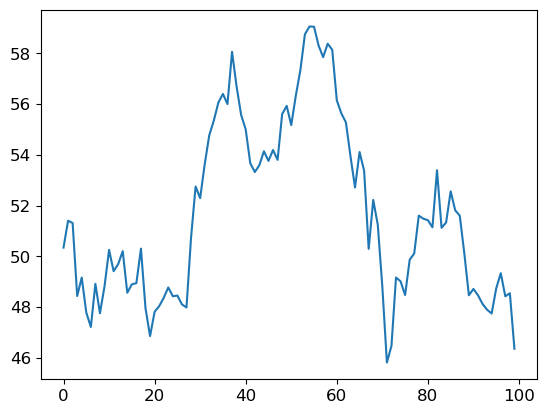

In [117]:
#Plot temp

plt.plot(well['Close'])
plt.show()

# Data Cleanup

In [118]:
# Remove all null values

well = well.dropna().reset_index(drop=True)

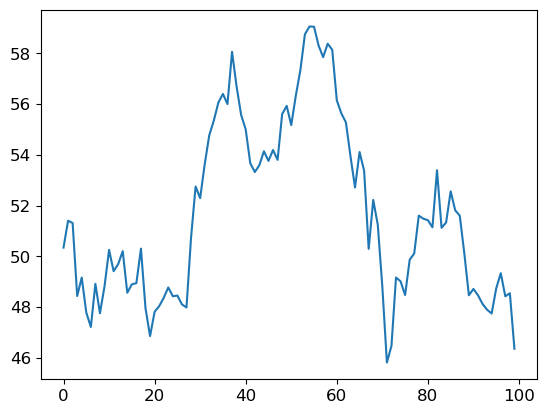

In [119]:
plt.plot(well['Close'])
plt.show()

## RESHAPE the data set!

In [120]:
well.shape

(100, 2)

In [121]:
well.shape[0]/10

10.0

In [122]:
well.groupby(['Date']).count()

,Close
Date,
2021-11-22,1
2021-11-23,1
2021-11-24,1
2021-11-26,1
2021-11-29,1
...,...
2022-04-08,1
2022-04-11,1
2022-04-12,1


In [123]:
well = np.array(well['Close']).reshape(10,10)

well

array([[50.34    , 51.400002, 51.310001, 48.43    , 49.16    , 47.779999,
        47.209999, 48.91    , 47.75    , 48.810001],
       [50.25    , 49.41    , 49.689999, 50.200001, 48.560001, 48.889999,
        48.939999, 50.299999, 47.950001, 46.849998],
       [47.810001, 48.029999, 48.360001, 48.77    , 48.419998, 48.450001,
        48.099998, 47.98    , 50.73    , 52.75    ],
       [52.290001, 53.630001, 54.77    , 55.349998, 56.060001, 56.400002,
        56.      , 58.060001, 56.689999, 55.57    ],
       [55.      , 53.669998, 53.32    , 53.59    , 54.139999, 53.759998,
        54.189999, 53.799999, 55.599998, 55.93    ],
       [55.169998, 56.330002, 57.330002, 58.75    , 59.060001, 59.049999,
        58.310001, 57.849998, 58.380001, 58.139999],
       [56.150002, 55.630001, 55.279999, 53.950001, 52.709999, 54.110001,
        53.369999, 50.290001, 52.220001, 51.240002],
       [48.790001, 45.810001, 46.459999, 49.16    , 49.009998, 48.470001,
        49.860001, 50.110001, 51.5999

In [124]:
# Convert to dataframe


well_df = pd.DataFrame(well, columns=np.arange(0,10,1))

well_df

,0,1,2,3,4,5,6,7,8,9
0,50.340000,51.400002,51.310001,48.430000,49.160000,47.779999,47.209999,48.910000,47.750000,48.810001
1,50.250000,49.410000,49.689999,50.200001,48.560001,48.889999,48.939999,50.299999,47.950001,46.849998
2,47.810001,48.029999,48.360001,48.770000,48.419998,48.450001,48.099998,47.980000,50.730000,52.750000
3,52.290001,53.630001,54.770000,55.349998,56.060001,56.400002,56.000000,58.060001,56.689999,55.570000
4,55.000000,53.669998,53.320000,53.590000,54.139999,53.759998,54.189999,53.799999,55.599998,55.930000
5,55.169998,56.330002,57.330002,58.750000,59.060001,59.049999,58.310001,57.849998,58.380001,58.139999
6,56.150002,55.630001,55.279999,53.950001,52.709999,54.110001,53.369999,50.290001,52.220001,51.240002
7,48.790001,45.810001,46.459999,49.160000,49.009998,48.470001,49.860001,50.110001,51.599998,51.480000
8,51.419998,51.139999,53.389999,51.119999,51.330002,52.560001,51.810001,51.599998,50.110001,48.459999
9,48.709999,48.459999,48.119999,47.889999,47.740002,48.730000,49.330002,48.419998,48.540001,46.349998


# Reshape for Standardizing Data

In [125]:
# Let's create a single sequence (i.e., feature) for standardization

well_1feature = np.array(well_df).ravel().reshape(-1,1)

well_1feature.shape

(100, 1)

In [126]:
well_1feature

array([[50.34    ],
       [51.400002],
       [51.310001],
       [48.43    ],
       [49.16    ],
       [47.779999],
       [47.209999],
       [48.91    ],
       [47.75    ],
       [48.810001],
       [50.25    ],
       [49.41    ],
       [49.689999],
       [50.200001],
       [48.560001],
       [48.889999],
       [48.939999],
       [50.299999],
       [47.950001],
       [46.849998],
       [47.810001],
       [48.029999],
       [48.360001],
       [48.77    ],
       [48.419998],
       [48.450001],
       [48.099998],
       [47.98    ],
       [50.73    ],
       [52.75    ],
       [52.290001],
       [53.630001],
       [54.77    ],
       [55.349998],
       [56.060001],
       [56.400002],
       [56.      ],
       [58.060001],
       [56.689999],
       [55.57    ],
       [55.      ],
       [53.669998],
       [53.32    ],
       [53.59    ],
       [54.139999],
       [53.759998],
       [54.189999],
       [53.799999],
       [55.599998],
       [55.93    ],


## Standardize the values

In [127]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

well_std = scaler.fit_transform(well_1feature)

In [128]:
well_reshaped = well_std.reshape(10,10)

well_reshaped.shape

(10, 10)

In [129]:
#Pandas version of the reshaped data

pd.DataFrame(well_reshaped)

,0,1,2,3,4,5,6,7,8,9
0,-0.387838,-0.082544,-0.108465,-0.937942,-0.727693,-1.125151,-1.289318,-0.799696,-1.133791,-0.828497
1,-0.413759,-0.655690,-0.575047,-0.428159,-0.900500,-0.805457,-0.791056,-0.399359,-1.076188,-1.393003
2,-1.116510,-1.053148,-0.958103,-0.840018,-0.940823,-0.932182,-1.032987,-1.067548,-0.275513,0.306273
3,0.173787,0.559724,0.888059,1.055105,1.259595,1.357520,1.242314,1.835621,1.441043,1.118469
4,0.954302,0.571244,0.470440,0.548204,0.706610,0.597165,0.721011,0.608686,1.127109,1.222153
5,1.003263,1.337359,1.625372,2.034349,2.123634,2.120753,1.907624,1.775137,1.927785,1.858661
6,1.285517,1.135750,1.034945,0.651888,0.294752,0.697970,0.484840,-0.402238,0.153626,-0.128626
7,-0.834258,-1.692536,-1.505328,-0.727693,-0.770896,-0.926422,-0.526084,-0.454081,-0.024942,-0.059503
8,-0.076785,-0.157428,0.490601,-0.163188,-0.102705,0.251551,0.035541,-0.024942,-0.454081,-0.929302
9,-0.857299,-0.929302,-1.027227,-1.093470,-1.136671,-0.851539,-0.678730,-0.940823,-0.906261,-1.537010


# Split the Data

In [130]:
from sklearn.model_selection import train_test_split
# if we neede to maintain the ordering of the data, we can use the following code to split the data
#train, test = train_test_split(well_reshaped, test_size=0.3)

split_point = int(len(well_reshaped)*0.7)
train, test = well_reshaped[:split_point], well_reshaped[split_point:]

In [131]:
train

array([[-0.38783799, -0.08254386, -0.1084653 , -0.9379424 , -0.72769307,
        -1.12515099, -1.28931828, -0.79969626, -1.13379109, -0.82849725],
       [-0.41375914, -0.65568987, -0.57504658, -0.42815949, -0.90050045,
        -0.80545681, -0.79105617, -0.39935879, -1.07618824, -1.39300317],
       [-1.11651003, -1.0531478 , -0.958103  , -0.84001805, -0.9408231 ,
        -0.93218185, -1.03298719, -1.06754815, -0.275513  ,  0.30627281],
       [ 0.17378722,  0.55972435,  0.88805863,  1.05510547,  1.2595954 ,
         1.35752004,  1.24231435,  1.83562096,  1.44104288,  1.11846885],
       [ 0.95430157,  0.571244  ,  0.4704401 ,  0.54820355,  0.70661029,
         0.59716515,  0.72101093,  0.60868594,  1.12710866,  1.22215345],
       [ 1.00326317,  1.33735914,  1.62537192,  2.03434949,  2.12363374,
         2.12075304,  1.90762416,  1.77513742,  1.92778505,  1.85866141],
       [ 1.28551684,  1.13574991,  1.03494486,  0.65188844,  0.29475201,
         0.69797048,  0.48484045, -0.40223834

In [132]:
train.shape

(7, 10)

In [133]:
test.shape

(3, 10)

# Create Input and Target values


In [134]:
train_inputs = train[:,:9]


pd.DataFrame(train_inputs)

,0,1,2,3,4,5,6,7,8
0,-0.387838,-0.082544,-0.108465,-0.937942,-0.727693,-1.125151,-1.289318,-0.799696,-1.133791
1,-0.413759,-0.655690,-0.575047,-0.428159,-0.900500,-0.805457,-0.791056,-0.399359,-1.076188
2,-1.116510,-1.053148,-0.958103,-0.840018,-0.940823,-0.932182,-1.032987,-1.067548,-0.275513
3,0.173787,0.559724,0.888059,1.055105,1.259595,1.357520,1.242314,1.835621,1.441043
4,0.954302,0.571244,0.470440,0.548204,0.706610,0.597165,0.721011,0.608686,1.127109
5,1.003263,1.337359,1.625372,2.034349,2.123634,2.120753,1.907624,1.775137,1.927785
6,1.285517,1.135750,1.034945,0.651888,0.294752,0.697970,0.484840,-0.402238,0.153626


## Add one more dimension to make it ready for RNNs

See here for more details: https://keras.io/layers/recurrent/, and https://shiva-verma.medium.com/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e


In [135]:
train_inputs

array([[-0.38783799, -0.08254386, -0.1084653 , -0.9379424 , -0.72769307,
        -1.12515099, -1.28931828, -0.79969626, -1.13379109],
       [-0.41375914, -0.65568987, -0.57504658, -0.42815949, -0.90050045,
        -0.80545681, -0.79105617, -0.39935879, -1.07618824],
       [-1.11651003, -1.0531478 , -0.958103  , -0.84001805, -0.9408231 ,
        -0.93218185, -1.03298719, -1.06754815, -0.275513  ],
       [ 0.17378722,  0.55972435,  0.88805863,  1.05510547,  1.2595954 ,
         1.35752004,  1.24231435,  1.83562096,  1.44104288],
       [ 0.95430157,  0.571244  ,  0.4704401 ,  0.54820355,  0.70661029,
         0.59716515,  0.72101093,  0.60868594,  1.12710866],
       [ 1.00326317,  1.33735914,  1.62537192,  2.03434949,  2.12363374,
         2.12075304,  1.90762416,  1.77513742,  1.92778505],
       [ 1.28551684,  1.13574991,  1.03494486,  0.65188844,  0.29475201,
         0.69797048,  0.48484045, -0.40223834,  0.15362633]])

In [136]:
train_inputs.shape 

(7, 9)

In [137]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(7, 9, 1)

In [138]:
train_x

array([[[-0.38783799],
        [-0.08254386],
        [-0.1084653 ],
        [-0.9379424 ],
        [-0.72769307],
        [-1.12515099],
        [-1.28931828],
        [-0.79969626],
        [-1.13379109]],

       [[-0.41375914],
        [-0.65568987],
        [-0.57504658],
        [-0.42815949],
        [-0.90050045],
        [-0.80545681],
        [-0.79105617],
        [-0.39935879],
        [-1.07618824]],

       [[-1.11651003],
        [-1.0531478 ],
        [-0.958103  ],
        [-0.84001805],
        [-0.9408231 ],
        [-0.93218185],
        [-1.03298719],
        [-1.06754815],
        [-0.275513  ]],

       [[ 0.17378722],
        [ 0.55972435],
        [ 0.88805863],
        [ 1.05510547],
        [ 1.2595954 ],
        [ 1.35752004],
        [ 1.24231435],
        [ 1.83562096],
        [ 1.44104288]],

       [[ 0.95430157],
        [ 0.571244  ],
        [ 0.4704401 ],
        [ 0.54820355],
        [ 0.70661029],
        [ 0.59716515],
        [ 0.72101093],
   

## Set the target

In [139]:
train_target = train[:,-1]


pd.DataFrame(train_target,columns=['9'])

,9
0,-0.828497
1,-1.393003
2,0.306273
3,1.118469
4,1.222153
5,1.858661
6,-0.128626


## Repeat for TEST

In [140]:
test.shape

(3, 10)

In [141]:
test

array([[-0.83425751, -1.69253559, -1.50532786, -0.72769307, -0.77089556,
        -0.9264216 , -0.52608383, -0.45408064, -0.02494246, -0.05950342],
       [-0.07678476, -0.15742805,  0.4906007 , -0.16318831, -0.10270476,
         0.25155067,  0.03554109, -0.02494246, -0.45408064, -0.9293023 ],
       [-0.85729911, -0.9293023 , -1.02722665, -1.09346959, -1.13667064,
        -0.85153856, -0.67873032, -0.9408231 , -0.9062607 , -1.53700956]])

In [142]:

test_inputs = test[:,:9]

In [143]:
test_inputs

array([[-0.83425751, -1.69253559, -1.50532786, -0.72769307, -0.77089556,
        -0.9264216 , -0.52608383, -0.45408064, -0.02494246],
       [-0.07678476, -0.15742805,  0.4906007 , -0.16318831, -0.10270476,
         0.25155067,  0.03554109, -0.02494246, -0.45408064],
       [-0.85729911, -0.9293023 , -1.02722665, -1.09346959, -1.13667064,
        -0.85153856, -0.67873032, -0.9408231 , -0.9062607 ]])

In [144]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(3, 9, 1)

In [145]:
# The last column (23) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target,columns=['9'])

,9
0,-0.059503
1,-0.929302
2,-1.537010


In [146]:
performance = pd.DataFrame({"model": [], "MSE": []})

# A normal (cross-sectional) NN

In [147]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 583ms/step - loss: 2.4477
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 2.3373
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 2.2300
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 2.1258
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 2.0247
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 1.9269
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 1.8323
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 1.7410
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 1.6529
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 1.5682
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 1.4867
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 1.4085
Epoch 13/100
1/1 [==============================] - 0s 10ms

### Predictions

In [148]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 91ms/step


In [149]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [150]:
comparison

,actual,predicted
0,51.480000,51.846729
1,48.459999,49.589832
2,46.349998,50.538471


In [151]:
mse_nn = mean_squared_error(comparison['actual'], comparison['predicted'])

In [152]:
performance = pd.concat([performance, pd.DataFrame({'model':"Cross NN", 'MSE': mse_nn}, index=[0])])
performance

,model,MSE
0,Cross NN,6.318107


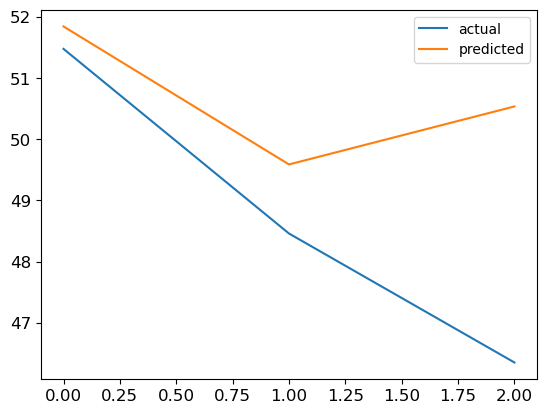

In [153]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Simple RNN

Simplest recurrent neural network

In [154]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [155]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 870ms/step - loss: 2.6212
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 2.4814
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 2.3469
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 2.2174
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 2.0922
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 1.9731
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 1.8596
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 1.7511
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 1.6475
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 1.5498
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 1.4565
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 1.3671
Epoch 13/100
1/1 [==============================] - 0s 4ms

### Predictions

In [156]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 114ms/step


In [157]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [158]:
comparison

,actual,predicted
0,51.480000,51.639496
1,48.459999,50.551018
2,46.349998,50.127140


In [159]:
mse_rnn = mean_squared_error(comparison['actual'], comparison['predicted'])

In [160]:
performance = pd.concat([performance, pd.DataFrame({'model':"Simple RNN", 'MSE': mse_rnn}, index=[0])])
performance

,model,MSE
0,Cross NN,6.318107
0,Simple RNN,6.221533


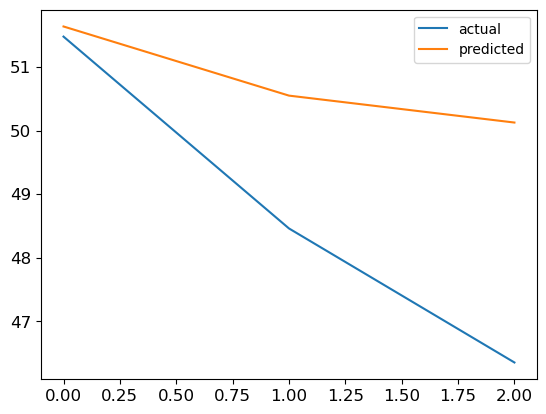

In [161]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with more layers

**Be careful: when stacking RNN layers, you have to set "return_sequences" to True. This enables the layer to send a "sequence" of values to the next layer -- jut like how it uses a sequence of values for training. However, if the output of RNN is sent to a DENSE layer, then a single value should be sent. That's why there is no "return sequences" right before DENSE layers.**

In [162]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [163]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.1788
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 2.0163
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 1.8640
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 1.7223
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 1.5999
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 1.5006
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 1.4085
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 1.3190
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2363
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 1.1626
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 1.0983
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0401
Epoch 13/100
1/1 [==============================] - 0s 2ms/ste

### Predictions

In [164]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 189ms/step


In [165]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [166]:
comparison

,actual,predicted
0,51.480000,51.511089
1,48.459999,49.053040
2,46.349998,49.671532


In [167]:
mse_rnn_ml = mean_squared_error(comparison['actual'], comparison['predicted'])

In [168]:
performance = pd.concat([performance, pd.DataFrame({'model':"Simple RNN more layers", 'MSE': mse_rnn_ml}, index=[0])])
performance

,model,MSE
0,Cross NN,6.318107
0,Simple RNN,6.221533
0,Simple RNN more layers,3.795083


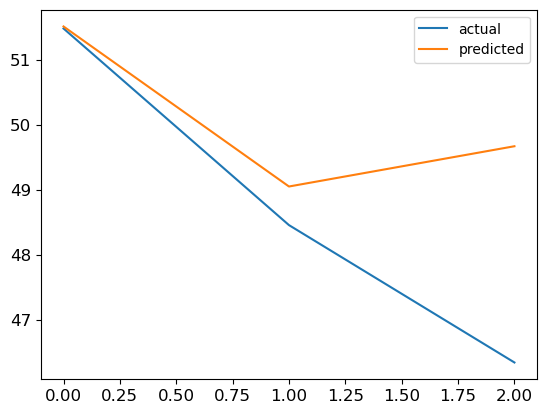

In [169]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with one layer

In [170]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [171]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.3775
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 1.3394
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 1.3020
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 1.2652
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 1.2290
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 1.1933
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 1.1581
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 1.1233
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0892
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0557
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0227
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 0.9902
Epoch 13/100
1/1 [==============================] - 0s 2ms/ste

### Predictions

In [172]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 136ms/step


In [173]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [174]:
mse_lstm = mean_squared_error(comparison['actual'], comparison['predicted'])

In [175]:
performance = pd.concat([performance, pd.DataFrame({'model':"LSTM one layers", 'MSE': mse_lstm}, index=[0])])
performance

,model,MSE
0,Cross NN,6.318107
0,Simple RNN,6.221533
0,Simple RNN more layers,3.795083
0,LSTM one layers,6.355907


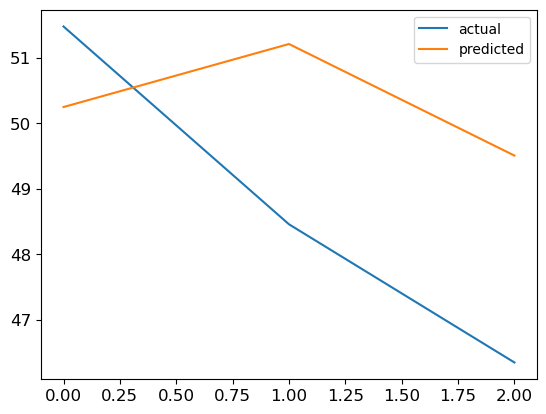

In [176]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [177]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [178]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.4143
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3488
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2859
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2255
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 1.1671
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 1.1105
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0555
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 1.0017
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.9490
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.8974
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8469
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7975
Epoch 13/100
1/1 [==============================] - 0s 7ms/st

### Predictions

In [179]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 562ms/step


In [180]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [181]:
mse_lstm_ml = mean_squared_error(comparison['actual'], comparison['predicted'])

In [182]:
performance = pd.concat([performance, pd.DataFrame({'model':"LSTM more layers", 'MSE': mse_lstm_ml}, index=[0])])
performance

,model,MSE
0,Cross NN,6.318107
0,Simple RNN,6.221533
0,Simple RNN more layers,3.795083
0,LSTM one layers,6.355907
0,LSTM more layers,6.995167


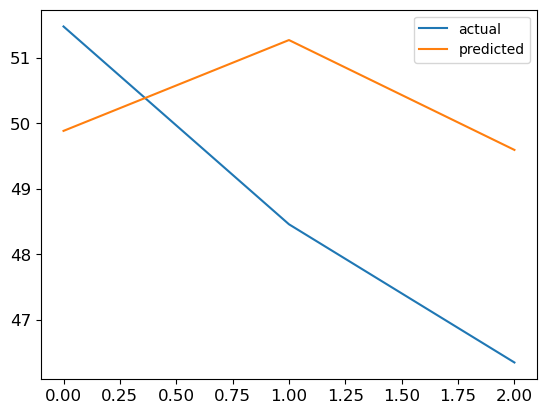

In [183]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [184]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [185]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.2247
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 1.1422
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0877
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0425
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0019
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.9651
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.9277
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.8918
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8564
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8211
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7860
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7509
Epoch 13/100
1/1 [==============================] - 0s 6ms/ste

### Predictions

In [186]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 234ms/step


In [187]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [188]:
mse_gru = mean_squared_error(comparison['actual'], comparison['predicted'])

In [189]:
performance = pd.concat([performance, pd.DataFrame({'model':"GRU", 'MSE': mse_gru}, index=[0])])
performance

,model,MSE
0,Cross NN,6.318107
0,Simple RNN,6.221533
0,Simple RNN more layers,3.795083
0,LSTM one layers,6.355907
0,LSTM more layers,6.995167
0,GRU,3.531046


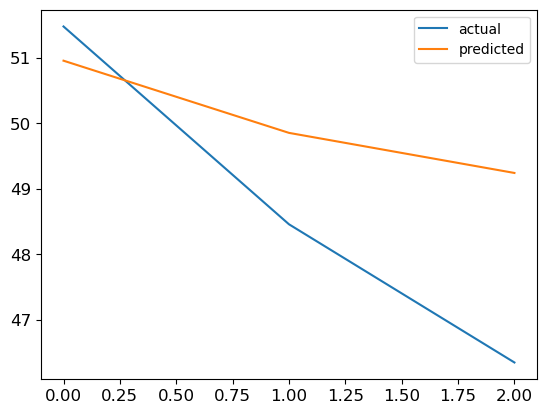

In [190]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

### Last Layer: GRU (you can change it to SimpleRNN or LSTM as well)

In [191]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=1, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.Conv1D(filters=20, kernel_size=1, strides=1, padding="valid"),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])


In [192]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.3771
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 1.3150
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 1.2572
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 1.2042
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 1.1574
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 1.1173
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0837
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0505
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0188
Epoch 10/100
1/1 [==============================] - 0s 47ms/step - loss: 0.9874
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 0.9566
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 0.9258
Epoch 13/100
1/1 [==============================] - 0s 5ms/

### Predictions

In [193]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 250ms/step


In [194]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [195]:
mse_conv1d = mean_squared_error(comparison['actual'], comparison['predicted'])

In [196]:
performance = pd.concat([performance, pd.DataFrame({'model':"Conv1D", 'MSE': mse_conv1d}, index=[0])])
performance

,model,MSE
0,Cross NN,6.318107
0,Simple RNN,6.221533
0,Simple RNN more layers,3.795083
0,LSTM one layers,6.355907
0,LSTM more layers,6.995167
0,GRU,3.531046
0,Conv1D,4.006345


In [197]:
performance.sort_values(by='MSE')

,model,MSE
0,GRU,3.531046
0,Simple RNN more layers,3.795083
0,Conv1D,4.006345
0,Simple RNN,6.221533
0,Cross NN,6.318107
0,LSTM one layers,6.355907
0,LSTM more layers,6.995167


Since we know that the lower the mse the better the model will be so from the above results we can say that GRU model is better performing model than all.